ArUco markers generated and saved as subplot.


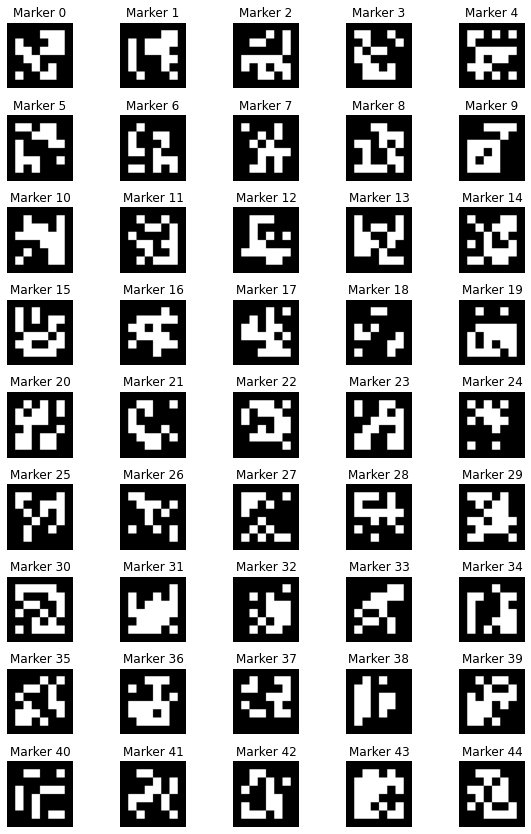

In [11]:
    
#ARRANGE THE ARUCO MARKERS AS FOLLOWS
#Metal Solid, metal hollow, palstic solid, plastic hollow, wood solid.
#cube, cylinders, spheres,
#small, medium, big,


import cv2
import cv2.aruco as aruco
import matplotlib.pyplot as plt
import matplotlib.backends.backend_agg as agg

# Function to generate ArUco markers and save them as a subplot
def generate_aruco_subplot(marker_ids, output_path='./aruco_markers'):
    # Create ArUco dictionary
    aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

    # Calculate the number of rows and columns for the subplot
    num_markers = 45
    num_rows = 9  # Adjust as needed
    num_cols = 5

    # Create a subplot
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8.27, 11.69))  # A4 size in inches

    # Flatten the axes array to handle both 1-row and multi-row subplots
    axes = axes.flatten()

    # Generate and save ArUco markers
    for i, marker_id in enumerate(marker_ids):
        marker_image = aruco.drawMarker(aruco_dict, marker_id, 200)

        # Plot the marker on the current subplot
        axes[i].imshow(marker_image, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Marker {marker_id}')

    # Adjust layout and save the plot
    plt.tight_layout()
    plt.savefig(f'{output_path}/aruco_markers_subplot.png', format='png', dpi=300, transparent=True)

# Example marker IDs (replace with your own IDs)
marker_ids = [i for i in range(45)]

# Specify the output path (optional)
output_path = '../misc/aruco_markers'

# Generate ArUco markers as subplots
generate_aruco_subplot(marker_ids, output_path)

print("ArUco markers generated and saved as subplot.")

In [2]:
import cv2
import cv2.aruco as aruco

# Function to detect ArUco markers and their IDs in an image
def detect_aruco_ids(image_path):
    # Read the input image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create ArUco dictionary
    aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

    # Initialize the ArUco parameters
    parameters = aruco.DetectorParameters_create()

    # Detect ArUco markers
    corners, ids, _ = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    
    
    # Draw detected markers and bounding boxes on the image
    #image_with_markers = image.copy()
    if ids is not None:
        for i in range(len(ids)):
            # Draw bounding box around the marker
            x, y, w, h = cv2.boundingRect(corners[i][0].astype(int))
            # Draw the rectangle
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2) 
            #text = f"ID: {ids[i][0]}"
            #cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 4, (0, 255, 0), 2)
            #image_with_markers = aruco.drawDetectedMarkers(image_with_markers, [corners[i]],  borderColor =(0,255,0))
            #rvec, tvec, _ = aruco.estimatePoseSingleMarkers([corners[i]], 100, cameraMatrix, distCoeffs)
            #image_with_markers = aruco.drawAxis(image_with_markers, cameraMatrix, distCoeffs, rvec, tvec, 100)
            #cv2.rectangle(image_with_markers, (rectangle_coordinates[0], rectangle_coordinates[1]),(rectangle_coordinates[0] + rectangle_coordinates[2], rectangle_coordinates[1] + rectangle_coordinates[3]),
            #  rectangle_color, rectangle_thickness)

    # Display the image with markers and bounding boxes
    cv2.imwrite('../misc/aruco_markers/detected arucos.png', image)
    #cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Return the detected ArUco IDs
    return ids

# Specify the path to the image with ArUco markers
image_path = '../misc/aruco_markers/aruco_markers_subplot.png'

# Detect ArUco markers and print their IDs
detected_ids = detect_aruco_ids(image_path)
#print("Detected ArUco IDs:", detected_ids)


In [9]:
#ARRANGE THE ARUCO MARKERS AS FOLLOWS
marker_id = 0

object_aruco_map = dict()

for object_material in ('Metal_Solid', 'Metal_Hollow', 'Plastic_Solid', 'Plastic_Hollow', 'Wood'):
    for object_shape in ('Cube', 'Cylinder', 'Sphere'):
        for object_size in ('5cm', '6cm', '7cm'):
            object_aruco_map[marker_id] = f'{object_material} {object_shape} {object_size}'
            marker_id += 1
#Metal Solid, metal hollow, palstic solid, plastic hollow, wood solid.
#cube, cylinders, spheres,
#small, medium, big,

In [10]:
object_aruco_map

{0: 'Metal_Solid Cube 5cm',
 1: 'Metal_Solid Cube 6cm',
 2: 'Metal_Solid Cube 7cm',
 3: 'Metal_Solid Cylinder 5cm',
 4: 'Metal_Solid Cylinder 6cm',
 5: 'Metal_Solid Cylinder 7cm',
 6: 'Metal_Solid Sphere 5cm',
 7: 'Metal_Solid Sphere 6cm',
 8: 'Metal_Solid Sphere 7cm',
 9: 'Metal_Hollow Cube 5cm',
 10: 'Metal_Hollow Cube 6cm',
 11: 'Metal_Hollow Cube 7cm',
 12: 'Metal_Hollow Cylinder 5cm',
 13: 'Metal_Hollow Cylinder 6cm',
 14: 'Metal_Hollow Cylinder 7cm',
 15: 'Metal_Hollow Sphere 5cm',
 16: 'Metal_Hollow Sphere 6cm',
 17: 'Metal_Hollow Sphere 7cm',
 18: 'Plastic_Solid Cube 5cm',
 19: 'Plastic_Solid Cube 6cm',
 20: 'Plastic_Solid Cube 7cm',
 21: 'Plastic_Solid Cylinder 5cm',
 22: 'Plastic_Solid Cylinder 6cm',
 23: 'Plastic_Solid Cylinder 7cm',
 24: 'Plastic_Solid Sphere 5cm',
 25: 'Plastic_Solid Sphere 6cm',
 26: 'Plastic_Solid Sphere 7cm',
 27: 'Plastic_Hollow Cube 5cm',
 28: 'Plastic_Hollow Cube 6cm',
 29: 'Plastic_Hollow Cube 7cm',
 30: 'Plastic_Hollow Cylinder 5cm',
 31: 'Plastic_